<h1 style="text-align:right"> قواعد البيانات </h1>
<font size="5">

| |<font size="5">الأهداف </font>|
|---:|-:|
|<font size="3"> تحميل البيانات وحفظها </font>|-  |
|<font size="3"> عرض البيانات   </font>|- |
|<font size="3">  تخطيط البيانات </font>|- |
|<font size="3"></font>|- |
|<font size="3">تحليل منحى التّعلم والاعتماد</font>|- |




In [ ]:
pwd

'C:\\Users\\User\\Pictures\\ML_Demo\\Introduction'

## Seaborn

In [14]:
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")


In [15]:
tips.keys()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [16]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [17]:
tips.shape

(244, 7)

In [18]:
tips.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [19]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [20]:
tips.time.nunique()

2

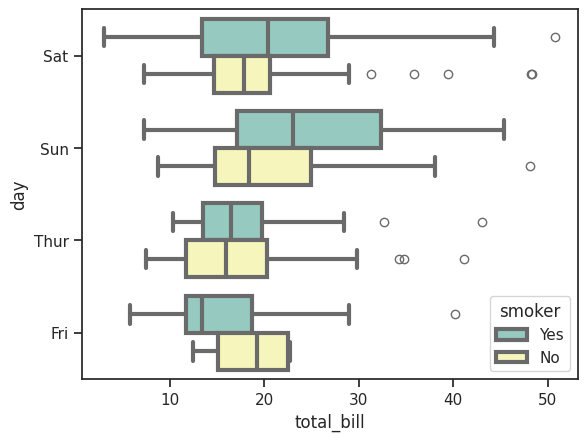

In [21]:
ax = sns.boxplot(y="day", x="total_bill",
                 hue="smoker",data=tips, palette="Set3", linewidth=3,
                order=["Sat", "Sun", "Thur", "Fri"], orient="h")

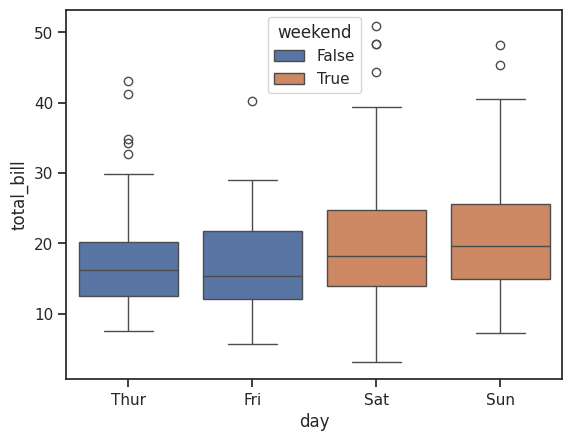

In [22]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.boxplot(x="day", y="total_bill", hue="weekend",
           data=tips, dodge=False)

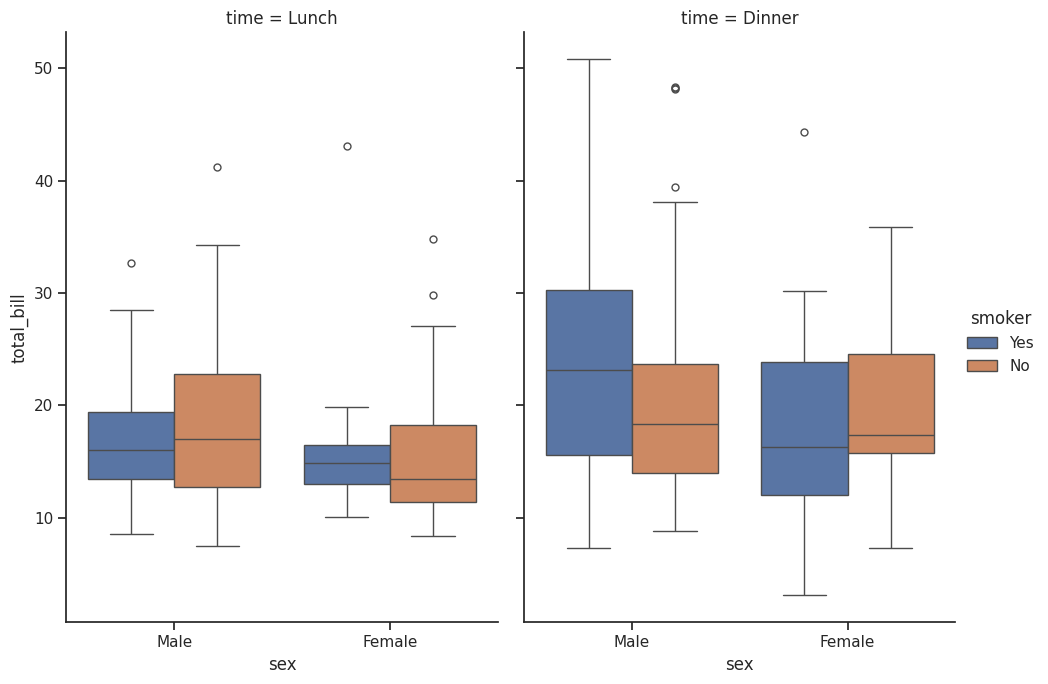

In [23]:
g = sns.catplot(x="sex", y="total_bill",
             hue="smoker", col="time",
             data=tips, kind="box",
             height=7, aspect=.7);

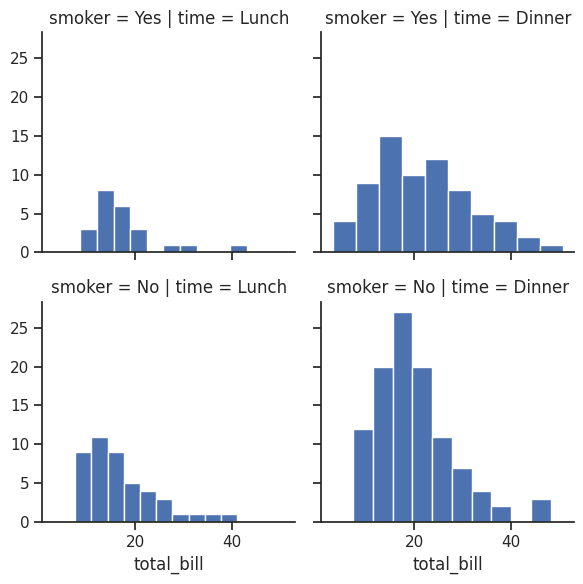

In [25]:
#Draw a univariate plot on each facet:
import matplotlib.pyplot as plt
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill")

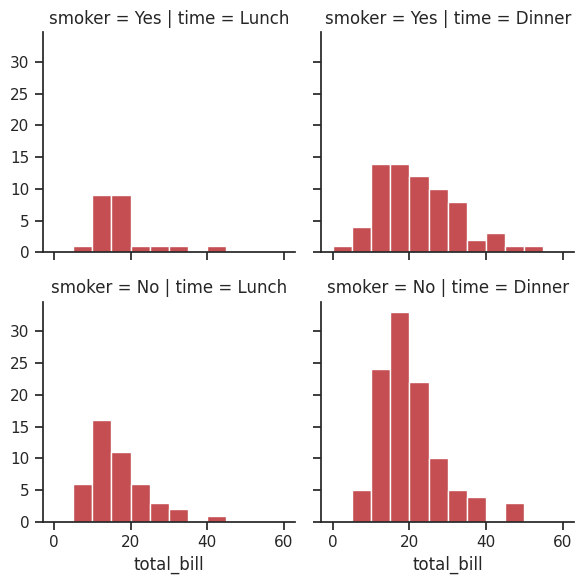

In [26]:
# Pass additional keyword arguments to the mapped function:
import numpy as np
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill", bins=bins, color="r")


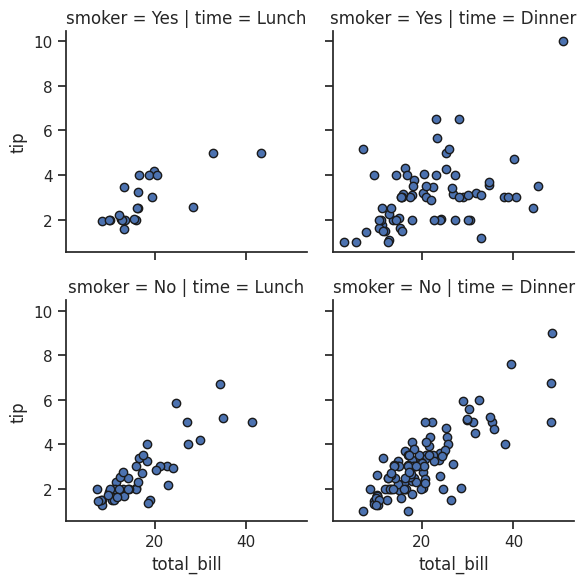

In [27]:
#Plot a bivariate function on each facet:#Plot a bivariate function on each facet:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="k")

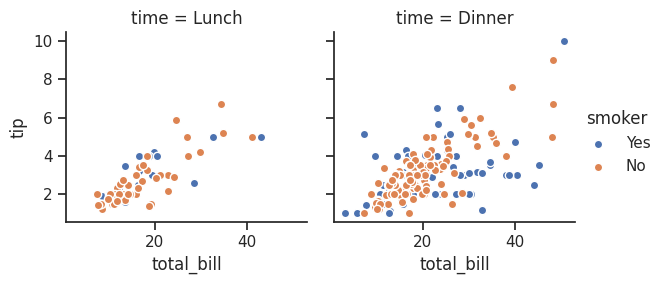

In [28]:
# Assign one of the variables to the color of the plot elements:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend())

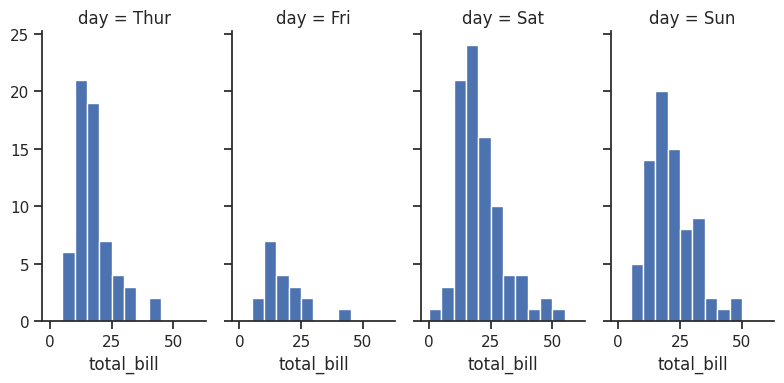

In [29]:
# Change the height and aspect ratio of each facet:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g = g.map(plt.hist, "total_bill", bins=bins)

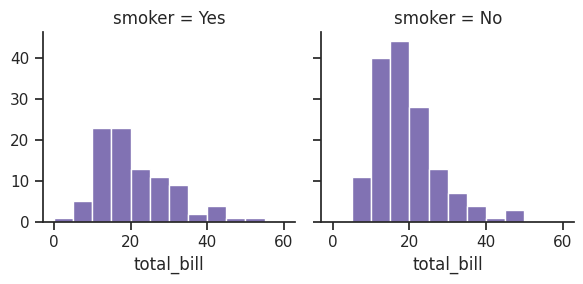

In [30]:
# Specify the order for plot elements:
g = sns.FacetGrid(tips, col="smoker", col_order=["Yes", "No"])
g = g.map(plt.hist, "total_bill", bins=bins, color="m")

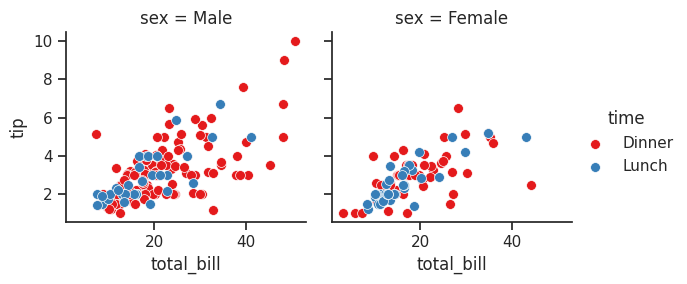

In [31]:
# Use a different color palette:
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time",
                  palette="Set1",
                  hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

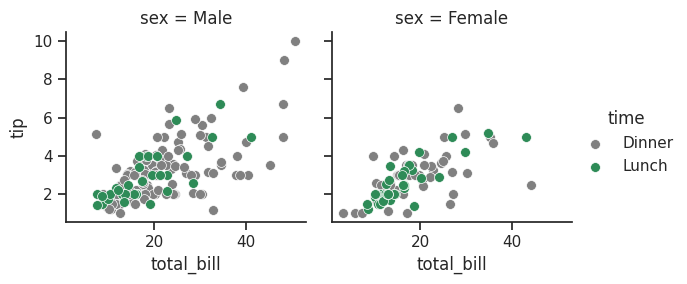

In [32]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, col="sex", hue="time",
                  palette=pal, hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())


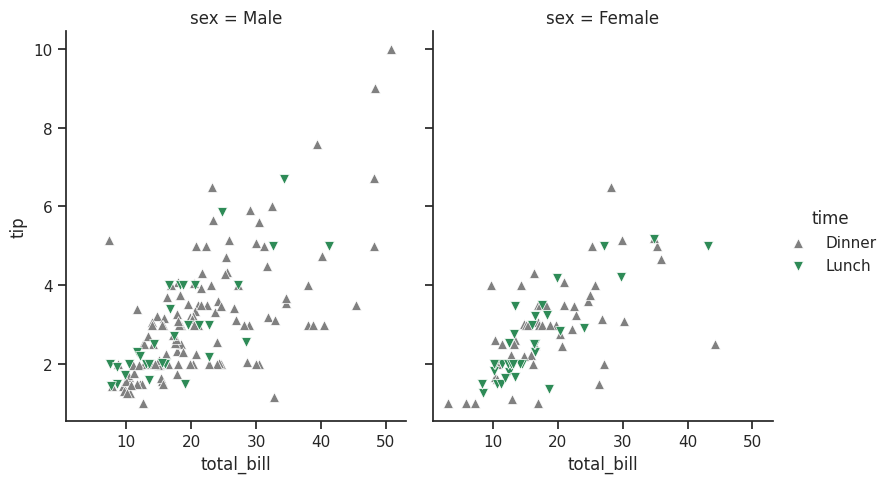

In [33]:
g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
                hue_order=["Dinner", "Lunch"],
                hue_kws=dict(marker=["^", "v"]),
                 height=5, aspect=.8)
g=(g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())


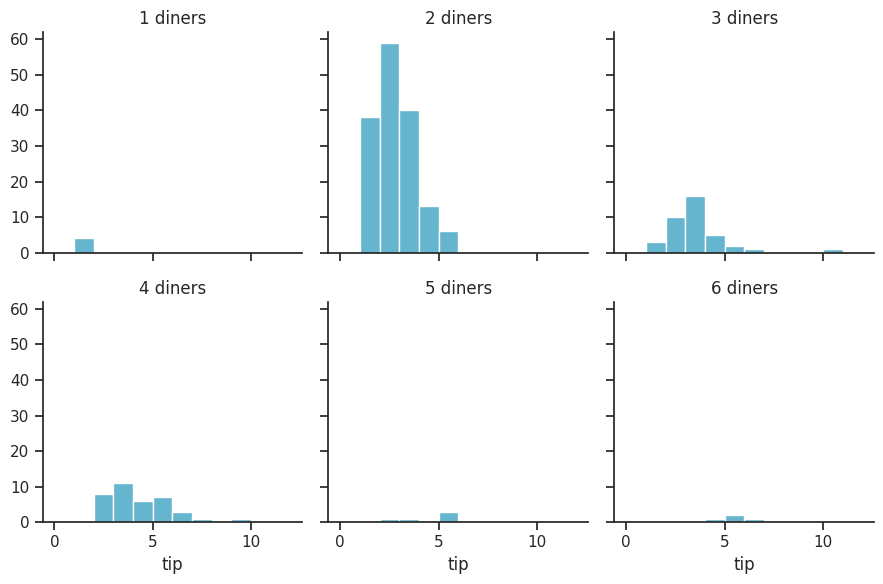

In [34]:
g = sns.FacetGrid(tips, col="size", col_wrap=3)
g = (g.map(plt.hist, "tip", bins=np.arange(0, 13), color="c")
     .set_titles("{col_name} diners"))

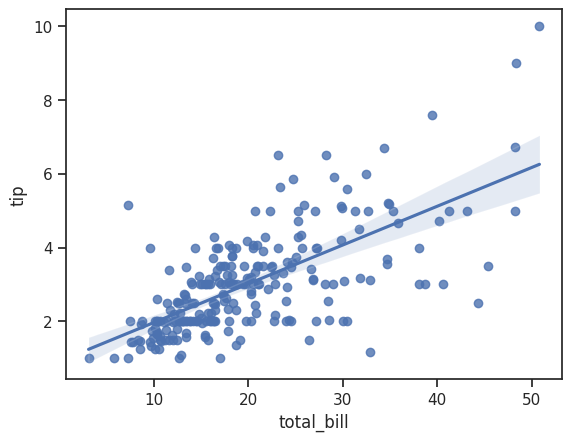

In [35]:
# linear regression models
sns.regplot(x="total_bill", y="tip", data=tips);

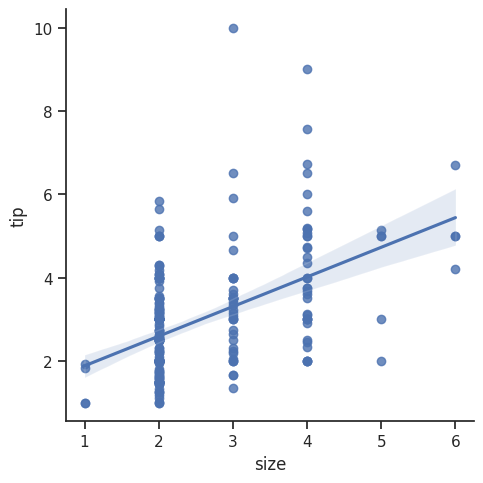

In [36]:
 #linear regression when one of the variables takes discrete values
sns.lmplot(x="size", y="tip", data=tips);

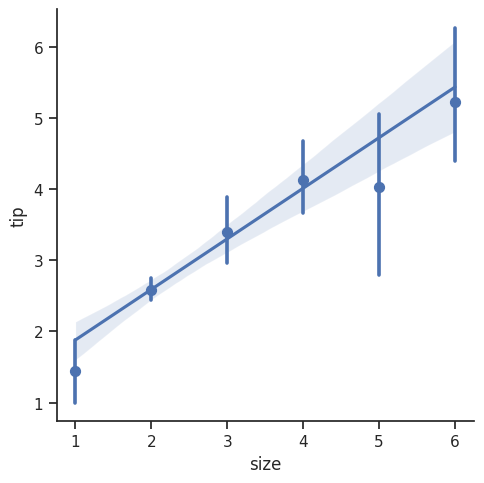

In [37]:
# observations in each discrete bin to plot an estimate of central tendency along
# with a confidence interval:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

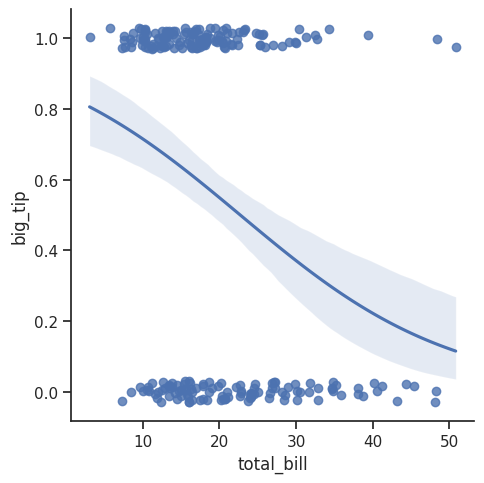

In [38]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

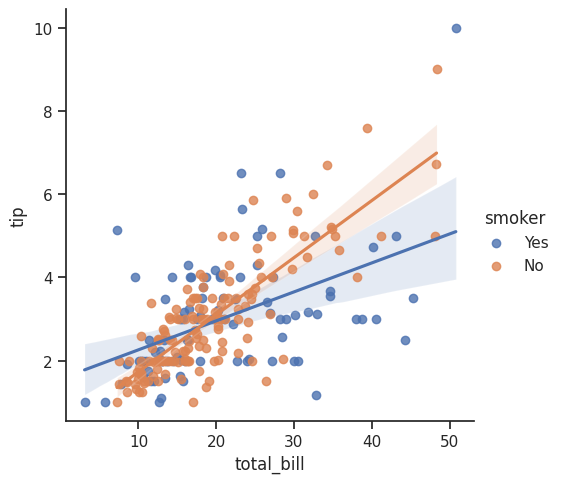

In [39]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

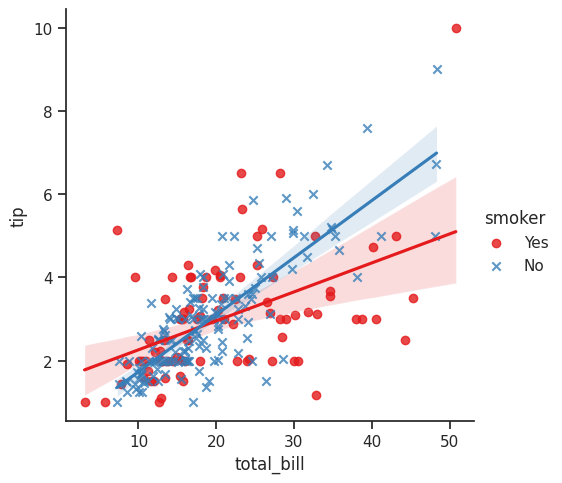

In [40]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

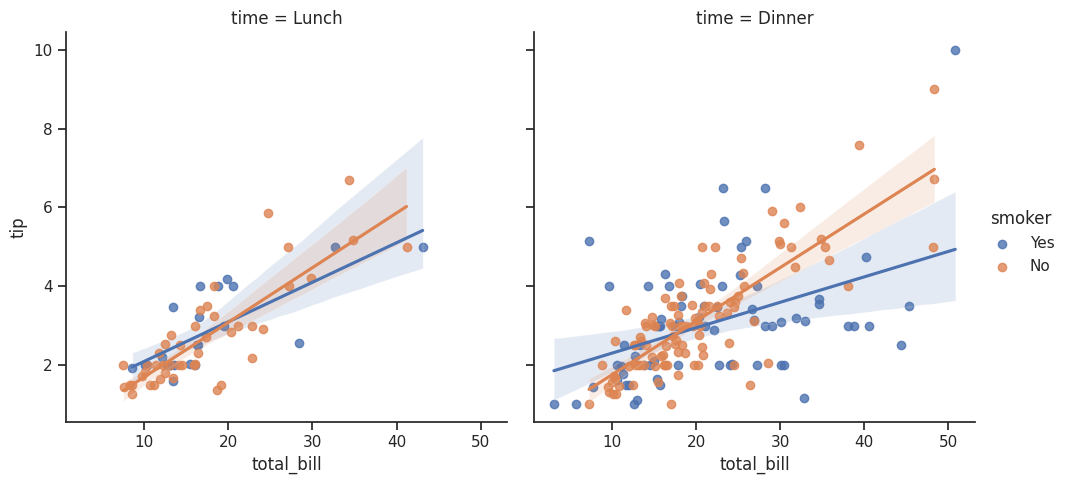

In [41]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

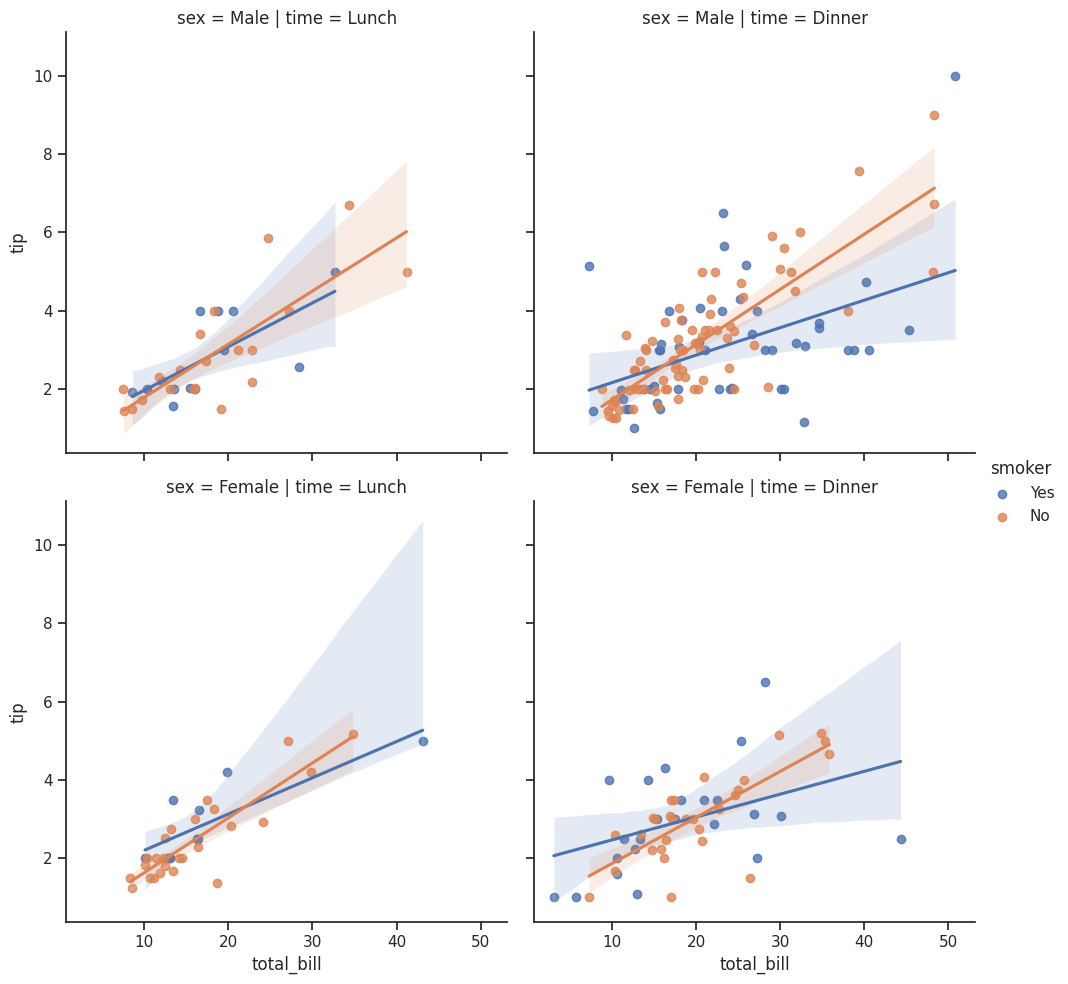

In [42]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## Introduction Residual Plot

-The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

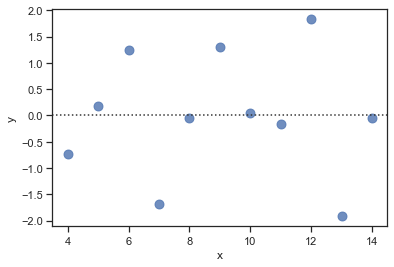

In [ ]:

sns.residplot(x="x", y="y", data=df[df.dataset == 'I'],
              scatter_kws={"s": 80});

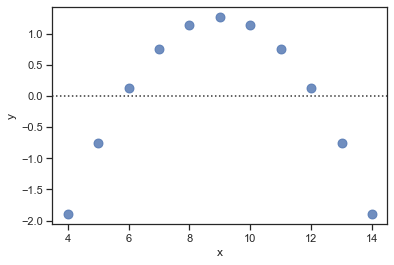

In [ ]:
sns.residplot(x="x", y="y", data=df[df.dataset == 'II'],
              scatter_kws={"s": 80});

## Seborn 4 Models fitting

In [ ]:
df = sns.load_dataset("anscombe")

In [ ]:
df.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95


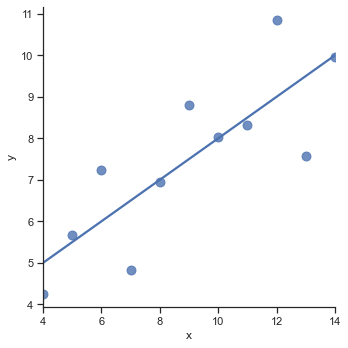

In [ ]:
sns.lmplot(x="x", y="y", data=df.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});
#df[df.dataset=="I"]

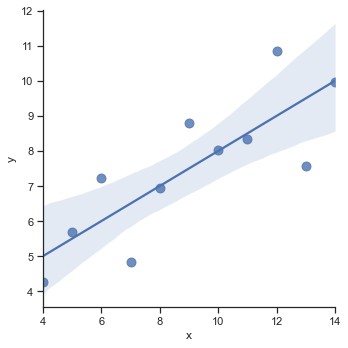

In [ ]:
sns.lmplot(x="x", y="y", data=df.query("dataset == 'I'"),
           ci=95, scatter_kws={"s": 80});
#df[df.dataset=="I"]

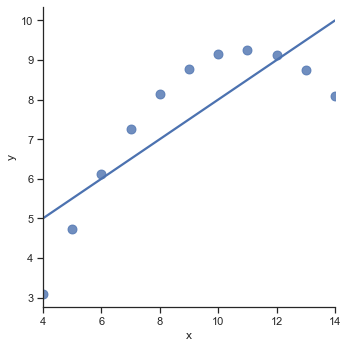

In [ ]:
sns.lmplot(x="x", y="y", data=df[df.dataset=='II'],
   ci=None, scatter_kws={"s": 80});

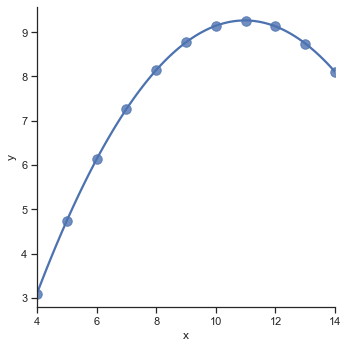

In [ ]:
sns.lmplot(x="x", y="y", data=df[df.dataset=='II'],
           order=2, ci=95, scatter_kws={"s": 90});

## matplotlipb

In [ ]:
import numpy as np

x = np.linspace(.5, 10, 20)
x

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [ ]:
y=x**3

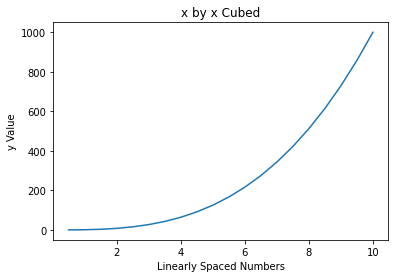

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('x by x Cubed')
plt.xlabel('Linearly Spaced Numbers')
plt.ylabel('y Value')
plt.show()

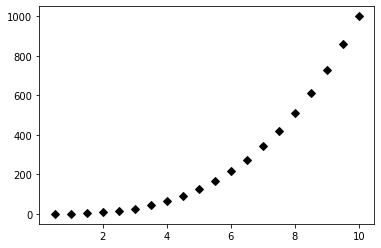

In [ ]:
plt.plot(x, y, 'Dk')

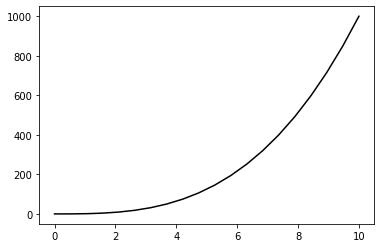

In [ ]:
plt.plot(x, y, 'k')

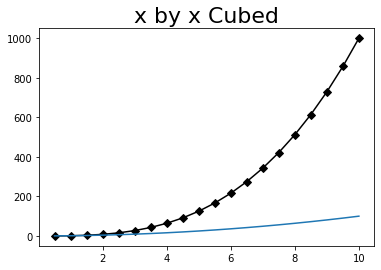

In [ ]:
plt.title('x by x Cubed', fontsize=22)
plt.plot(x, y, 'D-k')
y2 = x**2
plt.plot(x, y2)

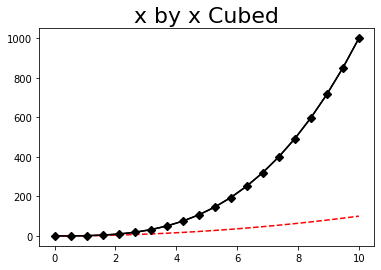

In [ ]:
plt.title('x by x Cubed', fontsize=22)
plt.plot(x, y, 'D-k')
y2 = x**2
plt.plot(x, y2, '--r')
plt.plot(x, y, 'D-k', label='x cubed')

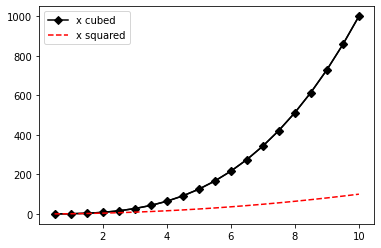

In [ ]:
plt.plot(x, y, 'D-k')
y2 = x**2
#plt.plot(x, y2, '--r')
plt.plot(x, y, 'D-k', label='x cubed')
plt.plot(x, y2, '--r', label='x squared')
plt.legend(loc='upper left')

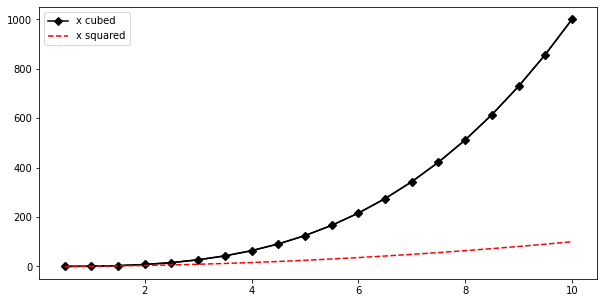

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'D-k')
y2 = x**2
#plt.plot(x, y2, '--r')
plt.plot(x, y, 'D-k', label='x cubed')
plt.plot(x, y2, '--r', label='x squared')
plt.legend(loc='upper left')

In [ ]:
n = 100
r = 2 * np.random.rand(n)
theta = 2 * np.pi * np.random.rand(n)
area = 200 * r**2 * np.random.rand(n)
colors = theta

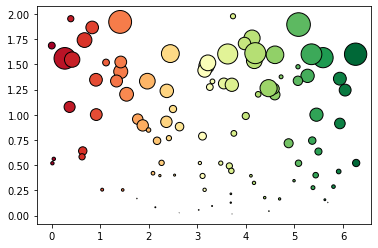

In [ ]:
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.RdYlGn, edgecolors="k")

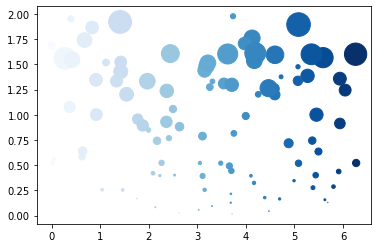

In [ ]:
c1 = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.Blues)

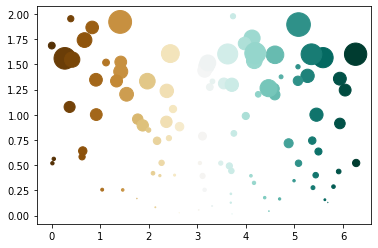

In [ ]:
c2 = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.BrBG)

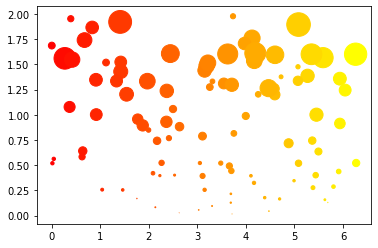

In [ ]:
c6 = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.autumn)

In [ ]:
import numpy as np

y = np.random.normal(loc=0, scale=0.1, size=100)

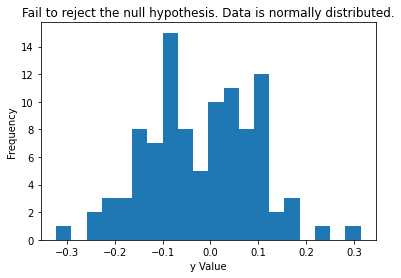

In [ ]:
from scipy.stats import shapiro
plt.hist(y, bins=20)
plt.xlabel('y Value')
plt.ylabel('Frequency')
shap_w, shap_p = shapiro(y)

if shap_p > 0.05:

    normal_YN = 'Fail to reject the null hypothesis. Data is normally distributed.'

else:

    normal_YN = 'Null hypothesis is rejected. Data is not normally distributed.'

plt.title(normal_YN)
plt.show()

In [ ]:
from scipy import stats
np.random.seed(12345678)
x = stats.norm.rvs(loc=5, scale=3, size=100)
stats.shapiro(x)

(0.9772805571556091, 0.08144091814756393)

In [5]:
import pandas as pd
dataset1 = "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/student.csv"

dataset2 = "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/mark.csv"

df1 = pd.read_csv(dataset1)

df2 = pd.read_csv(dataset2, header = 0)

In [6]:
df1.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [7]:
df2.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [8]:
df = pd.merge(df1, df2, on = 'Student_id')

df.head(10)

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
5,6,20,Male,2nd Class,yes,69,Gwalior
6,7,19,Female,3rd Class,yes,52,Bhopal
7,8,21,Male,3rd Class,yes,54,Chennai
8,9,22,Female,3rd Class,yes,55,Delhi
9,10,21,Male,1st Class,no,94,Mumbai


In [25]:
df_categorical = df.select_dtypes(exclude="number")
df_categorical

,Gender,Grade,Employed,City
0,Male,1st Class,yes,Chennai
1,Female,2nd Class,no,Delhi
2,Male,1st Class,no,Mumbai
3,Female,2nd Class,no,Pune
4,Male,1st Class,no,Kochi
...,...,...,...,...
227,Female,1st Class,no,Pune
228,Male,2nd Class,no,Chennai
229,Male,3rd Class,yes,Delhi
230,Female,1st Class,yes,Mumbai


In [26]:
df_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [27]:
df_categorical.Gender.value_counts()

Gender
Male      136
Female     96
Name: count, dtype: int64

In [28]:
df_categorical.Employed.value_counts()

Employed
no     133
yes     99
Name: count, dtype: int64

In [33]:
df_categorical.Grade.value_counts()

Grade
2    80
3    80
1    72
Name: count, dtype: int64

In [32]:
grade_mapping= {"1st Class":1, "2nd Class":2, "3rd Class":3}
df_categorical["Grade"] = df_categorical.Grade.map(grade_mapping)

In [ ]:
df_categorical.Employed.replace({"yes":1,"no":0}, inplace = True)

In [34]:
df_categorical.head()

,Gender,Grade,Employed,City
0,Male,1,yes,Chennai
1,Female,2,no,Delhi
2,Male,1,no,Mumbai
3,Female,2,no,Pune
4,Male,1,no,Kochi


###  Feature LabelEncoding 

In [35]:
dataset = "https://bit.ly/2rBuXm4"

In [36]:
df = pd.read_csv(dataset, header=0)

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [38]:
df.isna().sum()

age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [39]:
df = df.dropna()

In [41]:
data_column_category = df.select_dtypes(exclude="number").columns

data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [42]:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [43]:
#import the LabelEncoder class

from sklearn.preprocessing import LabelEncoder

#Creating the object instance

label_encoder = LabelEncoder()

for i in data_column_category:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


### OneHot Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

dataset = "https://bit.ly/2rBuXm4"
#reading the data into the dataframe into the object data

df = pd.read_csv(dataset, header=0)

In [45]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [46]:
#Before doing the encoding, remove all the missing data. To do so, use the dropna() function:
df = df.dropna()

In [48]:
#Select all the columns that are not numeric using the following code:
data_column_category = df.select_dtypes(exclude="number").columns

data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [49]:
#Print the first five rows of the new dataframe. Add the following code to do this:
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


- Iterate through these category columns and convert them to numeric data using OneHotEncoder. To do so, import the sklearn.preprocessing package and avail yourself of the - OneHotEncoder() class do the transformation. Before performing one-hot encoding, we need to perform label encoding:

In [50]:
#performing label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data_column_category:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [62]:
# Once we have performed label encoding, we execute one-hot encoding. Add the following code to implement this:
#Performing Onehot Encoding

onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoded = onehot_encoder.fit_transform(df[data_column_category])

- Now we create a new dataframe with the encoded data and print the first five rows. Add the following code to do this:



In [63]:
onehot_encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [72]:
#Creating a dataframe with encoded data with new column name
onehot_encoded_frame = pd.DataFrame(onehot_encoded)

onehot_encoded_frame

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41184,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
41185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
# Due to one-hot encoding, the number of columns in the new dataframe has increased.
# In order to view and print all the columns created, use the columns attribute:
onehot_encoded_frame.columns

RangeIndex(start=0, stop=53, step=1)

- For every level or category, a new column is created. In order to prefix the category name with the column name you can use this alternate way to create one-hot encoding. In order to prefix the category name with the column name, write the following code:

In [ ]:
data_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [78]:
df_onehot_getdummies = pd.get_dummies(df[data_column_category], prefix=data_column_category)

ValueError: Length of 'prefix' (10) did not match the length of the columns being encoded (0).

In [79]:
data_onehot_encoded_data = pd.concat([df_onehot_getdummies,df[data_column_number]],axis = 1)

NameError: name 'df_onehot_getdummies' is not defined

### OneHOt Encoding 2

In [ ]:
pwd

'/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project'

In [ ]:
import pandas as pd

In [80]:
dataset = "https://bit.ly/2Q88gzk"

In [81]:
df = pd.read_csv(dataset, header = 0)

In [82]:
df.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [83]:
df['bucket']=pd.cut(df['marks'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])

In [84]:
df.head(10)

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Above_Average
7,8,21,3rd Class,yes,70,Above_Average
8,9,22,3rd Class,yes,97,Excellent
9,10,21,1st Class,no,58,Average


In [85]:
dataset = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/USA_Housing.csv'

df = pd.read_csv(dataset, header=0)

In [86]:
X = df.drop('Price', axis=1)

X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\nFPO AE 09386


In [87]:
X.shape

(5000, 6)

In [88]:
y = df['Price']

y.head(10)

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
5    1.068138e+06
6    1.502056e+06
7    1.573937e+06
8    7.988695e+05
9    1.545155e+06
Name: Price, dtype: float64

In [89]:
y.shape

(5000,)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (4000, 6)
X_test :  (1000, 6)
y_train :  (4000,)
y_test :  (1000,)
y_train :  (4000,)
y_test :  (1000,)
X_test :  (1000, 6)
y_train :  (4000,)
y_test :  (1000,)


In [ ]:
pwd

'/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project'